In [1]:
import pandas as pd
import numpy as np

# Step 1: Business Problem 
- Restorent owner wants detailed reporrt on sales**
- whatever the data provided do the analysis**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# 2.1 load Data 
- understanding data very clearly

In [3]:
df = pd.read_csv(r"C:\Users\SHRI\Downloads\tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# 2.2 Data understanding

# Data Exploration

In [4]:
df.shape

(244, 7)

In [5]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [6]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
df.columns.tolist()

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [9]:
continous = ['total_bill',	'tip' ]
discrete_categorical = ['sex', 'smoker', 'day', 'time']
discrete_count = ['size']

In [10]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [12]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [13]:
df[continous].describe()

#df[['total_bill', 'tip']].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [14]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
df['sex'].nunique()

2

In [16]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [17]:
for i in discrete_categorical:
    print(i ,':' ,df[i].unique())

sex : ['Female' 'Male']
smoker : ['No' 'Yes']
day : ['Sun' 'Sat' 'Thur' 'Fri']
time : ['Dinner' 'Lunch']


In [18]:
df[ discrete_categorical].describe()

# top -> mode

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [19]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['smoker'].nunique()

2

In [21]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [22]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [23]:
df['day'].nunique()

4

In [24]:
df['day'].describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

In [25]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [26]:
df['time'].nunique()

2

In [27]:
df['time'].describe()

count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object

In [28]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [29]:
df['size'].nunique()

6

In [30]:
df['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [31]:
# return a count of the occurrences of each unique value in the size column
df['size'].value_counts()

# observation: It helps to understand the distribution of member sizes in the dataset.

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

**discriptive statistics**

In [32]:
df[continous].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [33]:
df[continous].mean()

total_bill    19.785943
tip            2.998279
dtype: float64

In [34]:
df[continous].median()

total_bill    17.795
tip            2.900
dtype: float64

In [35]:
df[continous].skew()

total_bill    1.133213
tip           1.465451
dtype: float64

<Axes: xlabel='total_bill', ylabel='Count'>

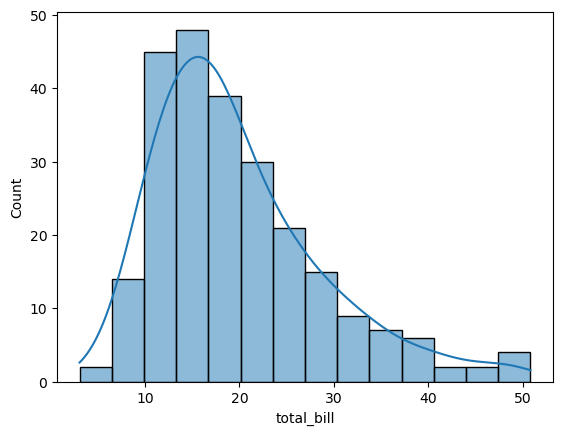

In [36]:
# bydefault plt.histplot having 10 bins size not sns.histplot

sns.histplot(df['total_bill'], kde=True)

# observation: betn 10 t0 20 dollers more number of count and 40 to 50 dolleres less nuber of count

<Axes: ylabel='total_bill'>

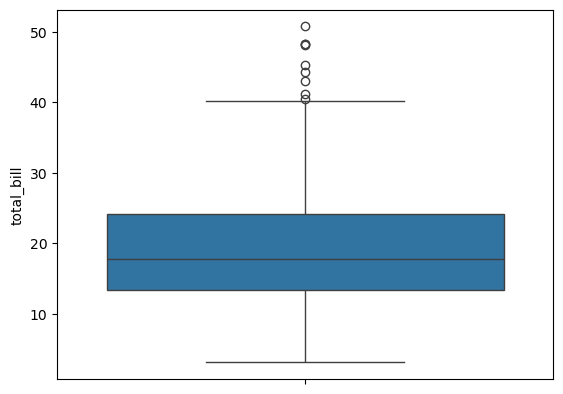

In [37]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill'>

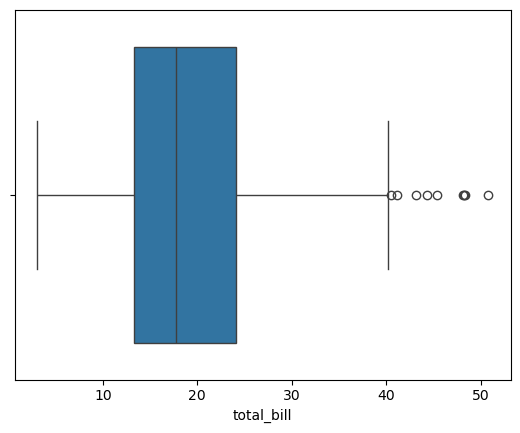

In [38]:
sns.boxplot(x = df['total_bill'])

# according to ituation decide outlires shold be delete or not delete

In [39]:
df[discrete_categorical].describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


# Step 3: Data Preprocessing

**Drop Duplicates**

In [40]:
df.duplicated().sum()

1

In [41]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [42]:
df = df.drop_duplicates()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**treat missing values**

In [43]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# my questions for analysis

**Think you are restarent owner and u want analysis salesfor 4 days what observations yo will write**

**Sales Analysis Observations for the Past 4 Days**

**what is avg of total bill**

In [44]:
df['total_bill'].mean()

19.813868312757204

**What is the total sales (sum of total bills) for each day of the week?**

In [45]:
# What is the average sales  for each day of the week?
df.groupby("day")["total_bill"].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.759508
Name: total_bill, dtype: float64

In [46]:
df.groupby("day")["total_bill"].sum()

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1083.33
Name: total_bill, dtype: float64

**Which day of the week has the highest total bill amount, and what is the corresponding value?"**

In [47]:
df.groupby("day")["total_bill"].sum().idxmax()

'Sat'

**Which day of the week has the lowest total bill amount, and what is the corresponding value?"**

In [48]:
df.groupby("day")["total_bill"].sum().idxmin()

'Fri'

**What is the total bill amount for male and female customers separately?**

In [49]:
df.groupby("sex")['total_bill'].sum()

sex
Female    1557.95
Male      3256.82
Name: total_bill, dtype: float64

**What is the highest total bill amount among male customers**

In [50]:
male = df[df['sex'] == 'Male']
male['total_bill'].max()

50.81

**What is the highest total bill amount among Female customers**

In [51]:
female = df[df['sex'] == 'Female']
female['total_bill'].max()

44.3

**check how many males and how many females**

In [52]:
df['sex'].value_counts()

sex
Male      157
Female     86
Name: count, dtype: int64

**show the count of female and male smokers**

In [53]:
pd.crosstab(df["sex"], df['smoker'], margins = True)

smoker,No,Yes,All
sex,,,
Female,54,32,86
Male,97,60,157
All,151,92,243


**check total_bill with time show which time has total sales for all days**

In [54]:
df.groupby('time')['total_bill'].sum()

time
Dinner    3660.30
Lunch     1154.47
Name: total_bill, dtype: float64

**check total_bill with time show which time has maximum sales for each day**

In [55]:
df.groupby(['day', 'time'])['total_bill'].sum()

day   time  
Fri   Dinner     235.96
      Lunch       89.92
Sat   Dinner    1778.40
Sun   Dinner    1627.16
Thur  Dinner      18.78
      Lunch     1064.55
Name: total_bill, dtype: float64

In [56]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [57]:
df['size'].describe()

count    243.000000
mean       2.572016
std        0.952356
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [58]:
df['size'].info()

<class 'pandas.core.series.Series'>
Index: 243 entries, 0 to 243
Series name: size
Non-Null Count  Dtype
--------------  -----
243 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


In [59]:
df['size'].max()

6

In [60]:
df['size'].min()

1

**"How many dining parties (transactions) occurred for each day and time slot (Lunch and Dinner) in terms of customer groups?"**

In [61]:
df.groupby(['day', 'time'])['size'].count()

day   time  
Fri   Dinner    12
      Lunch      7
Sat   Dinner    87
Sun   Dinner    76
Thur  Dinner     1
      Lunch     60
Name: size, dtype: int64

In [62]:
df.groupby(['time'])['size'].count()

time
Dinner    176
Lunch      67
Name: size, dtype: int64

# PLOTS FOR CONTINOUS DATA

**1. UNIVARIATE(SINGLE VARIABLE)**

# Histogram/ Distribution plot
- For observing frequency distributions

<Axes: xlabel='total_bill', ylabel='Count'>

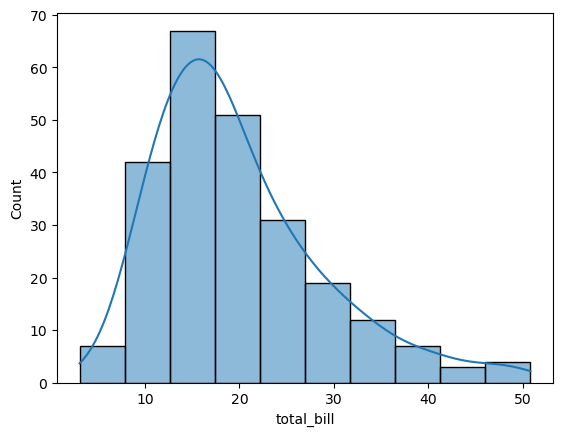

In [63]:
sns.histplot(df['total_bill'], bins = 10, kde = True)

<Axes: xlabel='total_bill', ylabel='Density'>

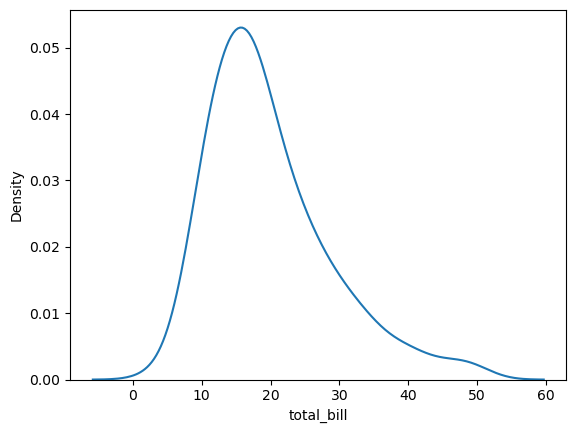

In [64]:
sns.kdeplot(df["total_bill"])

# BoxPlot
- For analyzing distribution, spread, and outliers

<Axes: xlabel='tip'>

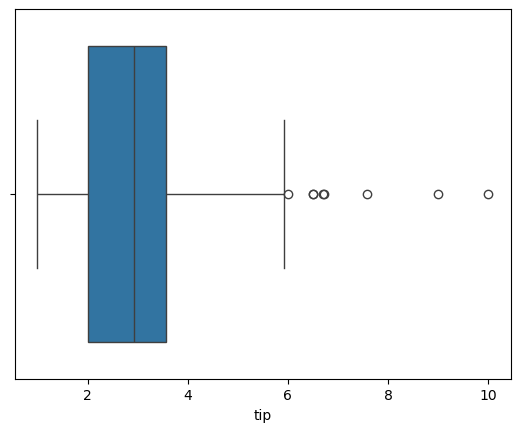

In [65]:
sns.boxplot(x = df['tip'])

<Axes: ylabel='total_bill'>

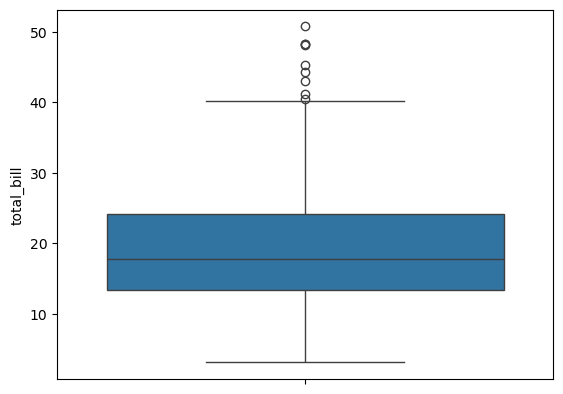

In [66]:
sns.boxplot(y = df['total_bill'])

**2. Bivariate**

# Scatter plot
- For visualizing relationships between two variables

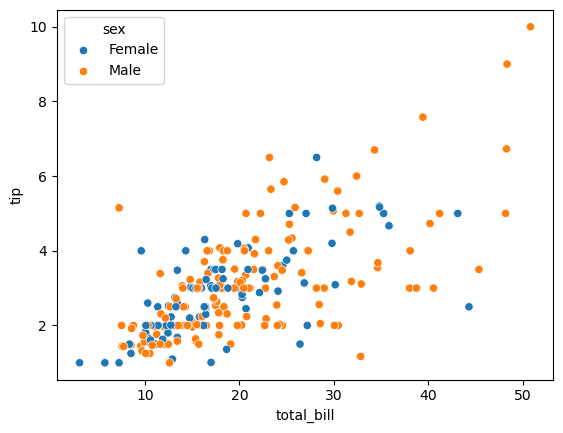

In [67]:
sns.scatterplot(x = df["total_bill"], y = df["tip"], hue = df["sex"])
plt.show()

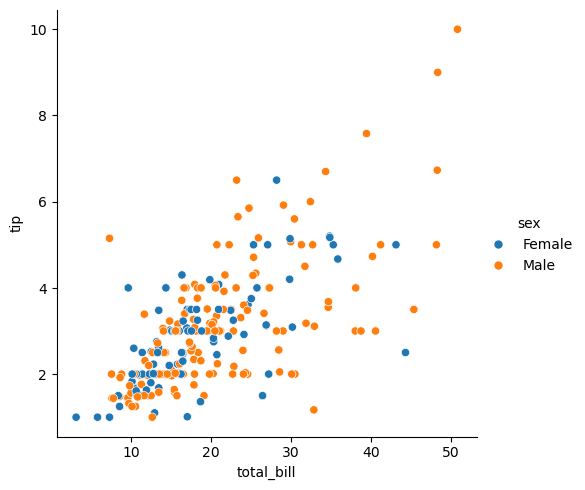

In [68]:
sns.relplot(x = df["total_bill"], y = df["tip"], hue = df["sex"])

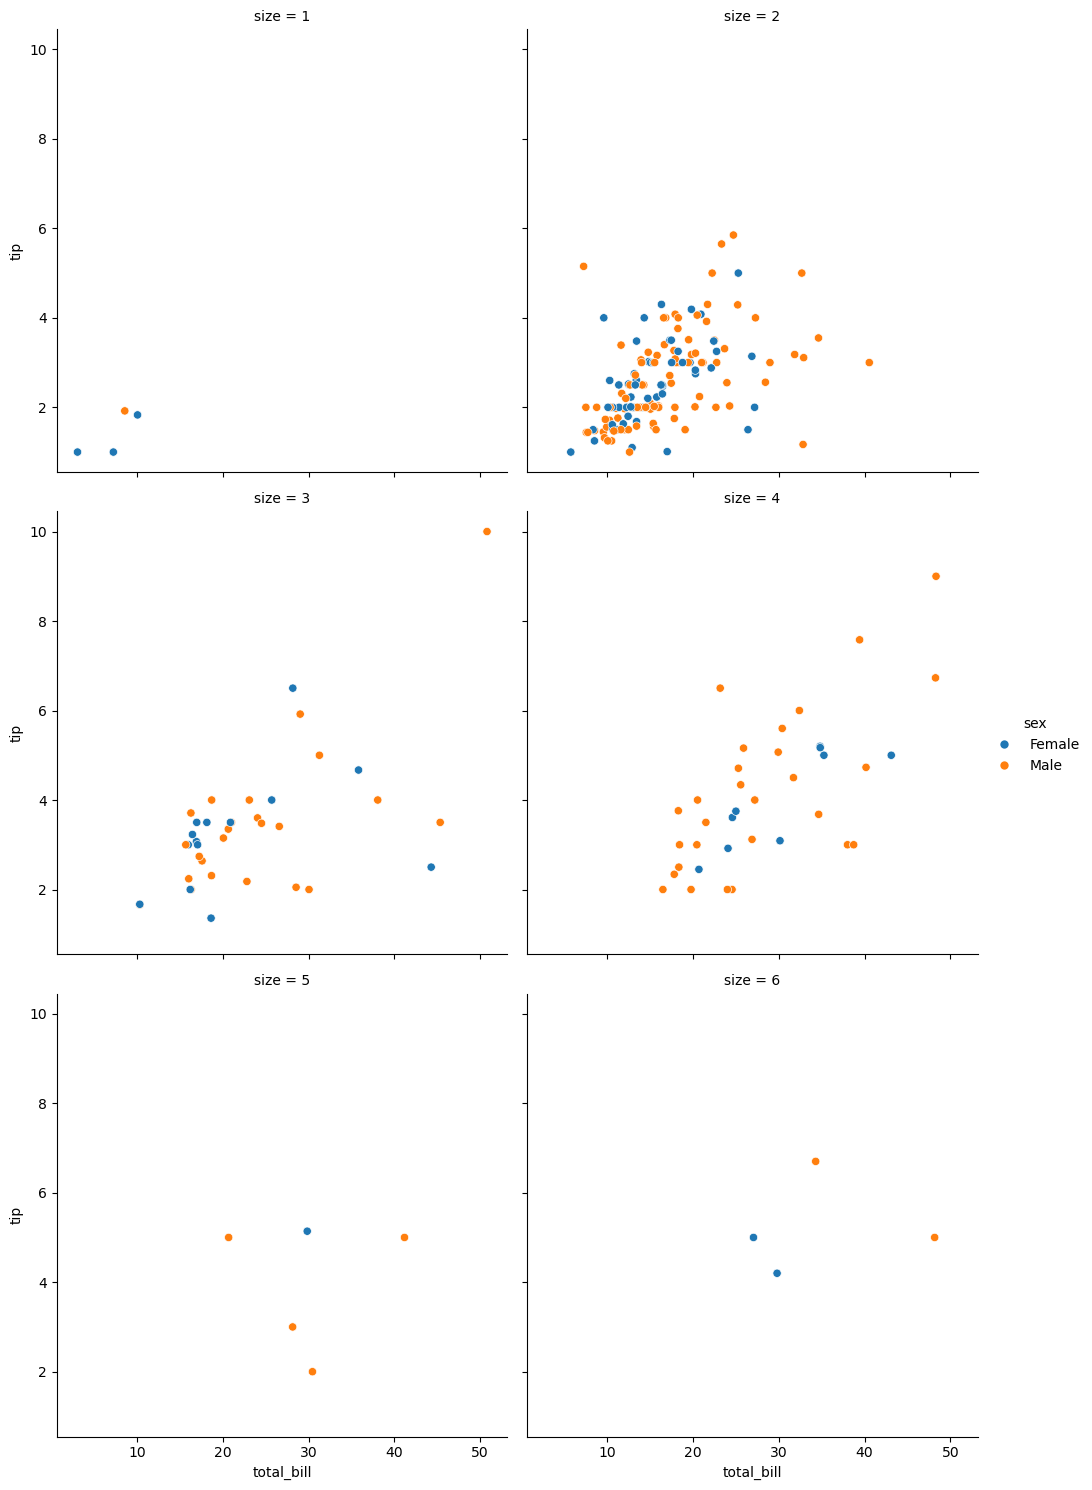

In [69]:
sns.relplot(x = df["total_bill"], y = df["tip"], col = df["size"] ,col_wrap = 2,hue = df["sex"])

In [70]:
df['sno'] = pd.DataFrame(np.arange(1,245))
df

,total_bill,tip,sex,smoker,day,time,size,sno
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,2
2,21.01,3.50,Male,No,Sun,Dinner,3,3
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,5
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,240
240,27.18,2.00,Female,Yes,Sat,Dinner,2,241
241,22.67,2.00,Male,Yes,Sat,Dinner,2,242
242,17.82,1.75,Male,No,Sat,Dinner,2,243


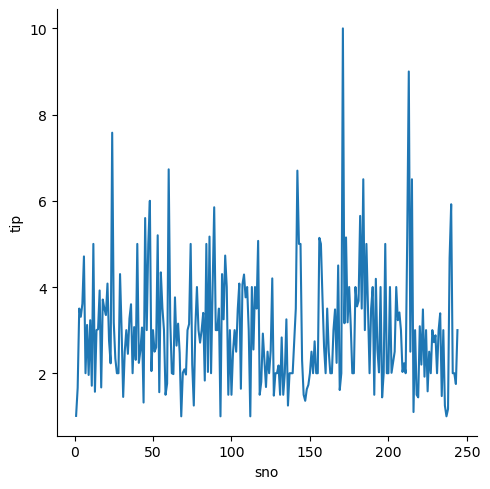

In [71]:
sns.relplot(x = "sno", y = 'tip', data = df, kind = "line")

# joint plot
-  visualize the relationship between two continuous variables while showing their marginal distributions.

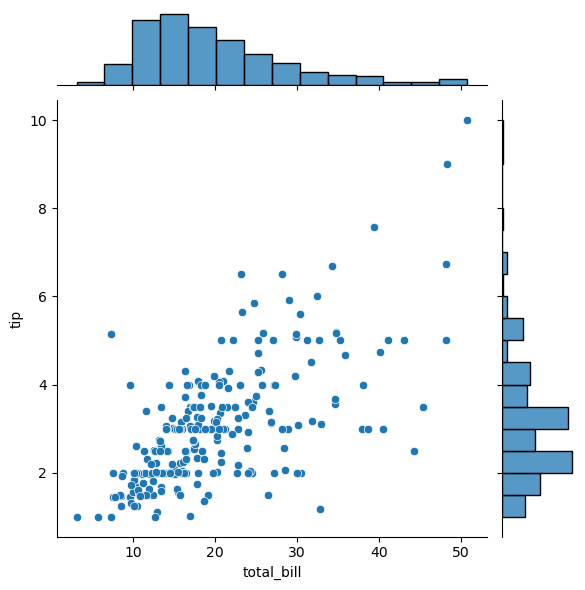

In [72]:
sns.jointplot(x = 'total_bill', y = "tip", data=df)

# Violin plot

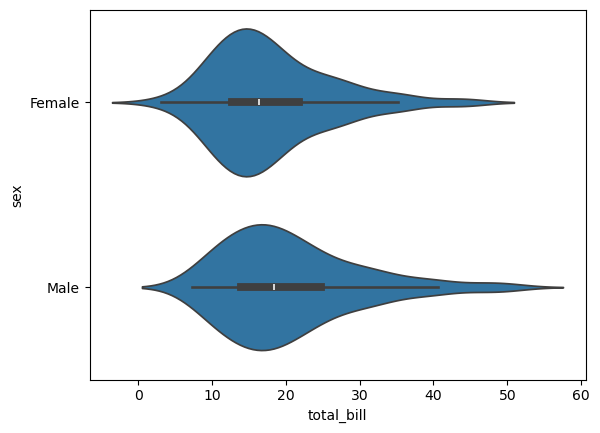

In [73]:
sns.violinplot(x = "total_bill", y = "sex", data = df)
plt.show()

# Pairplot - multiple continous variable

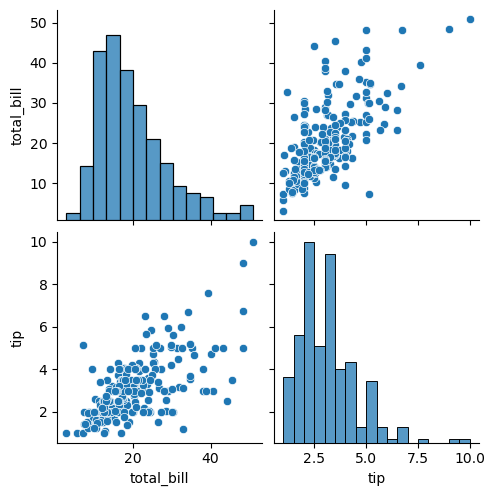

In [75]:
sns.pairplot(df, vars=continous)

# Heat PLOT

In [78]:
c_m = df[continous].corr()
c_m

,total_bill,tip
total_bill,1.000000,0.674998
tip,0.674998,1.000000


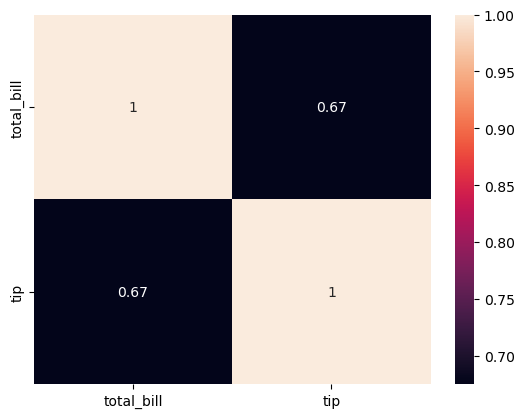

In [80]:
sns.heatmap(c_m, annot = True)
plt.show()

# PLOTS FOR DISCRETE VARIABLE

# countplot

In [81]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [82]:
df['smoker'].nunique()

2

In [83]:
df['smoker'].value_counts()

smoker
No     151
Yes     92
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

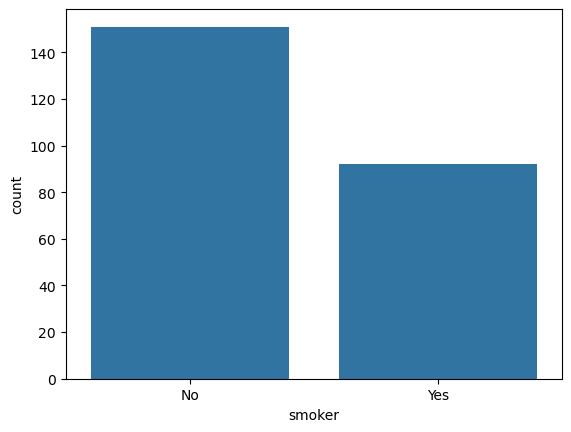

In [84]:
sns.countplot(x = "smoker", data = df)

<Axes: xlabel='count', ylabel='smoker'>

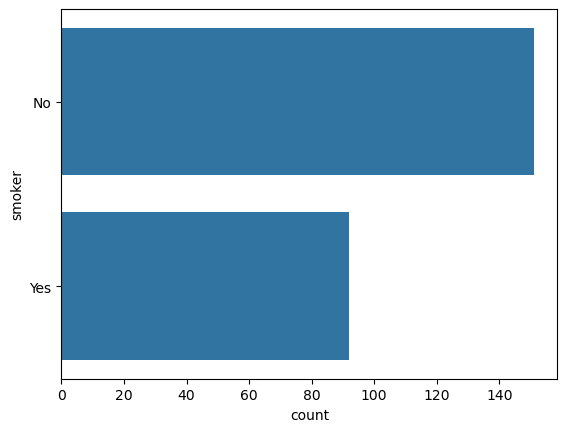

In [85]:
sns.countplot(y=df["smoker"])

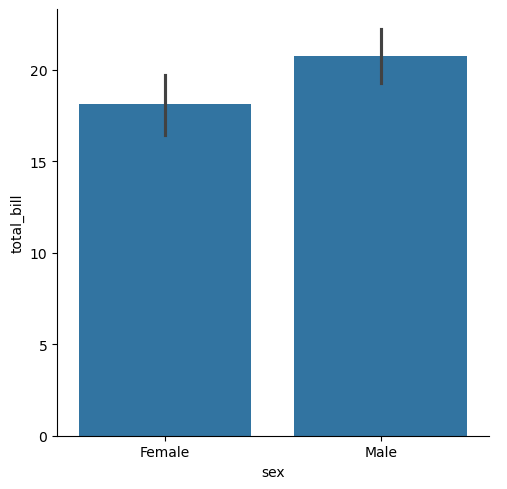

In [86]:
sns.catplot(x = 'sex', y = 'total_bill', data = df, kind = 'bar')
plt.show()

In [91]:
df[(df["sex"] == 'Female') & (df['total_bill'])]


# all female records with total bill

,total_bill,tip,sex,smoker,day,time,size,sno
0,16.99,1.01,Female,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,5
11,35.26,5.00,Female,No,Sun,Dinner,4,12
14,14.83,3.02,Female,No,Sun,Dinner,2,15
16,10.33,1.67,Female,No,Sun,Dinner,3,17
...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2,227
229,22.12,2.88,Female,Yes,Sat,Dinner,2,230
238,35.83,4.67,Female,No,Sat,Dinner,3,239
240,27.18,2.00,Female,Yes,Sat,Dinner,2,241


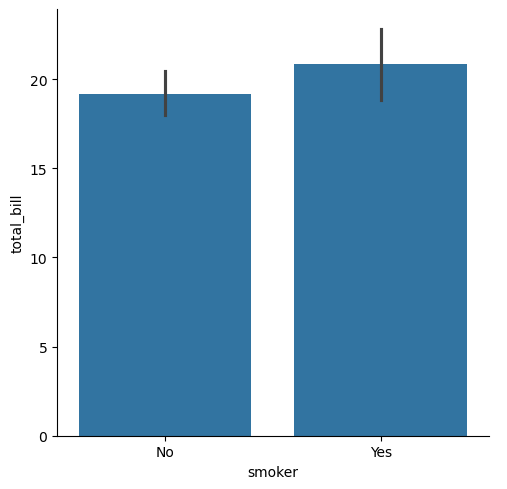

In [92]:
sns.catplot(x = 'smoker', y = 'total_bill', data = df, kind = 'bar')
plt.show()

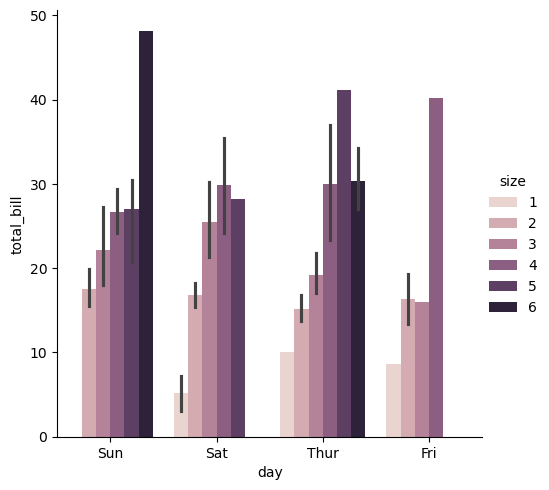

In [93]:
sns.catplot(x = 'day', y = 'total_bill', data = df, hue = 'size', kind = 'bar')
plt.show()


# kind = 'bar' --- barplot

# BOXPLOT

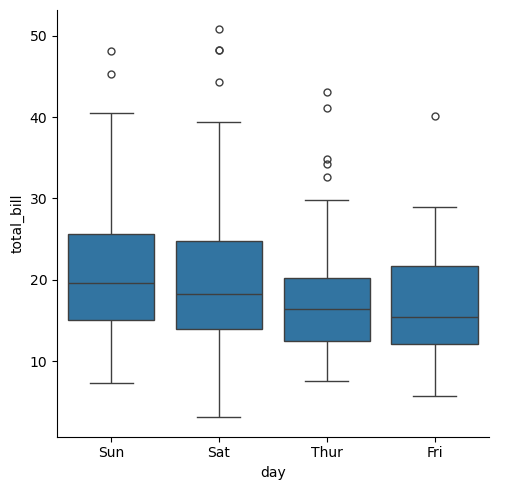

In [96]:
sns.catplot(x = 'day', y = 'total_bill', data = df, kind = 'box')
plt.show()


# kind = 'box' ------boxplot

In [98]:
df.groupby('time')['total_bill'].sum()

time
Dinner    3660.30
Lunch     1154.47
Name: total_bill, dtype: float64

In [99]:
pd.crosstab(df["day"], df["time"], margins= True)

time,Dinner,Lunch,All
day,,,
Fri,12,7,19
Sat,87,0,87
Sun,76,0,76
Thur,1,60,61
All,176,67,243
